## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


#To display Matplotlib plots directly in the output cells of the notebook without the need to call plt.show()
%matplotlib inline
# pd.options.display.float_format = '{:.5f}'.format

In [2]:
train = pd.read_csv('Train Dataset.csv')

test = pd.read_csv('Test Dataset.csv')

sub = pd.read_csv('Sample Submission.csv')

In [3]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [9]:
train.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
train.shape, test.shape

((7303, 15), (2697, 14))

## Exploratory Data Analysis

In [8]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Age

In [13]:
train['Age'].describe()

count    7303.000000
mean       53.172669
std        14.185970
min        29.000000
25%        41.000000
50%        53.000000
75%        65.000000
max        77.000000
Name: Age, dtype: float64

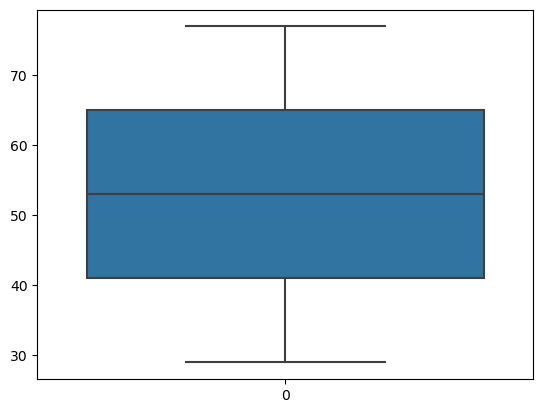

In [11]:
sns.boxplot(train['Age'])
plt.show()

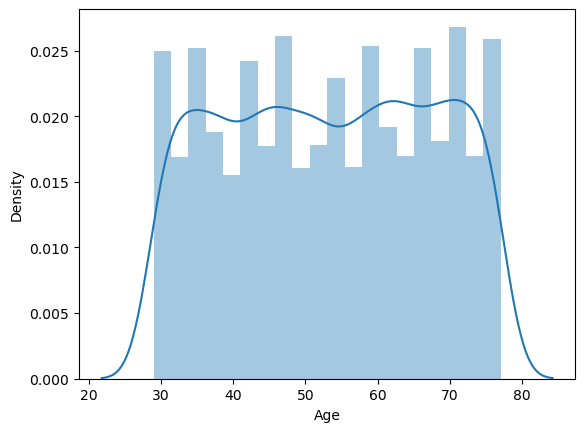

In [12]:
sns.distplot(train['Age'])
plt.show()

### Sex

In [15]:
train['Sex'].value_counts()

Sex
0    3654
1    3649
Name: count, dtype: int64

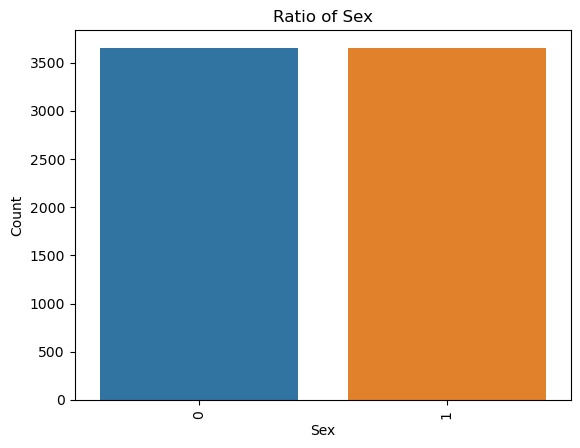

In [19]:
#Countplot of Sex

sns.countplot(x = 'Sex', data = train)
plt.title('Ratio of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### cp = chest pain type (4 values)

In [22]:
train['cp'].value_counts()

cp
1    1858
3    1829
2    1814
0    1802
Name: count, dtype: int64

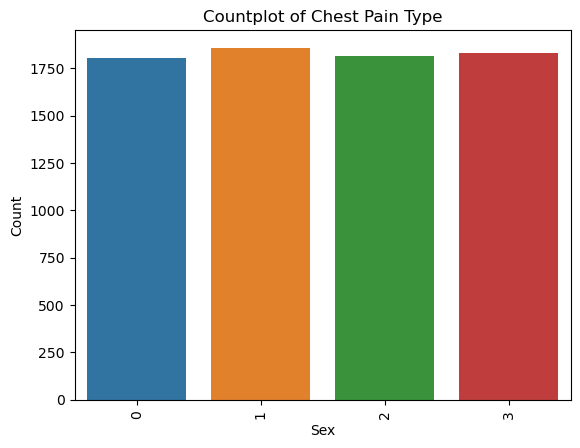

In [23]:
#Countplot of 

sns.countplot(x = 'cp', data = train)
plt.title('Countplot of Chest Pain Type')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### resting blood pressure

In [24]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
train['trestbps'].describe()

count    7303.000000
mean      147.447487
std        31.099538
min        94.000000
25%       120.000000
50%       148.000000
75%       174.000000
max       200.000000
Name: trestbps, dtype: float64

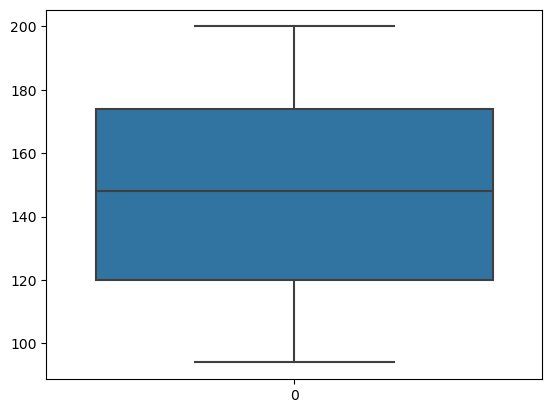

In [28]:
sns.boxplot(train['trestbps'])

plt.show()

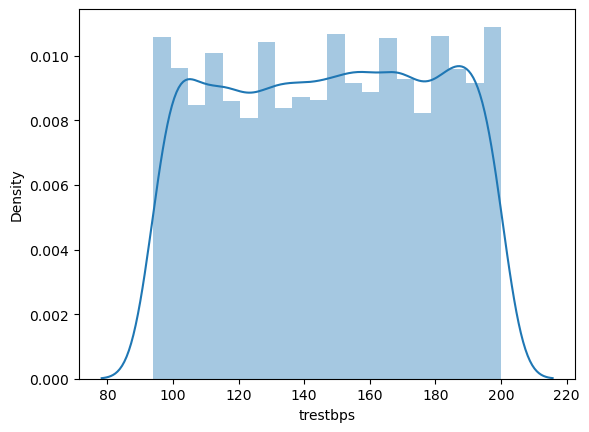

In [31]:
sns.distplot(train['trestbps'])
plt.show()